### PISA Data Cleaning


In [ ]:
#Importing essential libraries and configurations

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
import pylab as plt
from zipfile import ZipFile
from StringIO import StringIO
import urllib2

import os
from __future__ import division
from scipy import stats
from IPython.display import display, HTML

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(20, 10))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (50, 50)

# Size of matplotlib histogram bins
bin_size = 10

In [ ]:
#Too many columns in the datasets. These are the few variables that are potentially important.
col_to_use = ["CNT","ESCS","BELONG","ST57Q01","OUTHOURS","SUBNATIO","OECD","NC","SCHOOLID","STIDSTD","PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ","PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE"]

In [ ]:
#it will take some time to load the data from Amazon S3
r = urllib2.urlopen("https://s3-ap-southeast-1.amazonaws.com/udacity-pisa-data/pisa2012.csv.zip").read()
file = ZipFile(StringIO(r))
f = file.open("pisa2012.csv")
df = pd.read_csv(f)

In [ ]:
#df = pd.read_csv("data/pisa2012.csv")

In [270]:
df.head(5)

,CNT,SUBNATIO,OECD,NC,SCHOOLID,STIDSTD,ST57Q01,BELONG,ESCS,OUTHOURS,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,80000,Non-OECD,Albania,1,1,NaN,-1.18,NaN,NaN,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,80000,Non-OECD,Albania,1,2,NaN,NaN,NaN,8.0,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,80000,Non-OECD,Albania,1,3,NaN,NaN,NaN,24.0,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,80000,Non-OECD,Albania,1,4,10.0,NaN,NaN,17.0,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,80000,Non-OECD,Albania,1,5,NaN,2.63,NaN,NaN,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [271]:
df.tail(5)

,CNT,SUBNATIO,OECD,NC,SCHOOLID,STIDSTD,ST57Q01,BELONG,ESCS,OUTHOURS,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
485485,Vietnam,7040000,Non-OECD,Viet Nam,162,4955,5.0,NaN,-2.08,8.0,...,460.2272,476.1134,472.9362,472.1419,481.6736,559.8098,528.1052,519.7128,535.5651,538.3626
485486,Vietnam,7040000,Non-OECD,Viet Nam,162,4956,NaN,-1.13,-1.22,NaN,...,490.9325,479.7053,448.4294,565.5134,451.6372,538.7355,493.9761,493.0436,561.1153,535.0056
485487,Vietnam,7040000,Non-OECD,Viet Nam,162,4957,NaN,-0.15,-1.92,NaN,...,462.6239,514.7503,434.5558,457.8122,511.5425,536.8706,571.3726,488.3812,548.9929,563.9127
485488,Vietnam,7040000,Non-OECD,Viet Nam,162,4958,4.0,-0.15,-0.71,13.0,...,505.2873,522.1282,513.3068,528.5437,522.9301,511.0407,532.4879,524.0955,551.1376,514.7706
485489,Vietnam,7040000,Non-OECD,Viet Nam,162,4959,6.0,NaN,-1.16,21.0,...,532.3506,483.1034,479.9261,459.2741,488.6635,530.6229,473.7411,477.4711,477.4711,505.4457


CNT and NC columns are similar. We will see what are the differences and whether to standardize them later.

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 25 columns):
CNT         485490 non-null object
SUBNATIO    485490 non-null int64
OECD        485490 non-null object
NC          485490 non-null object
SCHOOLID    485490 non-null int64
STIDSTD     485490 non-null int64
ST57Q01     301367 non-null float64
BELONG      313399 non-null float64
ESCS        473648 non-null float64
OUTHOURS    308799 non-null float64
PV1MATH     485490 non-null float64
PV2MATH     485490 non-null float64
PV3MATH     485490 non-null float64
PV4MATH     485490 non-null float64
PV5MATH     485490 non-null float64
PV1READ     485490 non-null float64
PV2READ     485490 non-null float64
PV3READ     485490 non-null float64
PV4READ     485490 non-null float64
PV5READ     485490 non-null float64
PV1SCIE     485490 non-null float64
PV2SCIE     485490 non-null float64
PV3SCIE     485490 non-null float64
PV4SCIE     485490 non-null float64
PV5SCIE     485490 non-null float6

Most of the columns are measures and continuous, except for columns explaining about the identity of the countries.

In [273]:
df.describe()

,SUBNATIO,SCHOOLID,STIDSTD,ST57Q01,BELONG,ESCS,OUTHOURS,PV1MATH,PV2MATH,PV3MATH,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
count,4.854900e+05,485490.000000,485490.000000,301367.000000,313399.000000,473648.000000,308799.000000,485490.000000,485490.000000,485490.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000
mean,4.315457e+06,240.152197,6134.066201,5.493770,-0.022259,-0.265546,11.104100,469.621653,469.648358,469.648930,...,472.004640,472.068052,472.022059,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184
std,2.524434e+06,278.563016,6733.144944,5.383815,0.983503,1.131791,10.476669,103.265391,103.382077,103.407631,...,102.505523,102.626198,102.640489,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347
min,8.000000e+04,1.000000,1.000000,0.000000,-3.690000,-5.950000,0.000000,19.792800,6.473000,42.226200,...,0.083400,0.703500,0.703500,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600
25%,2.030000e+06,61.000000,1811.000000,NaN,NaN,NaN,NaN,395.318600,395.318600,395.240700,...,403.600700,403.360100,403.360100,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300
50%,4.100000e+06,136.000000,3740.000000,NaN,NaN,NaN,NaN,466.201900,466.124000,466.201900,...,475.455000,475.535200,475.455000,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900
75%,6.880000e+06,291.000000,7456.000000,NaN,NaN,NaN,NaN,541.057800,541.447300,541.291500,...,544.502500,544.503500,544.503500,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700
max,8.580000e+06,1471.000000,33806.000000,30.000000,2.630000,3.690000,180.000000,962.229300,957.010400,935.745400,...,904.802600,881.239200,884.447000,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600


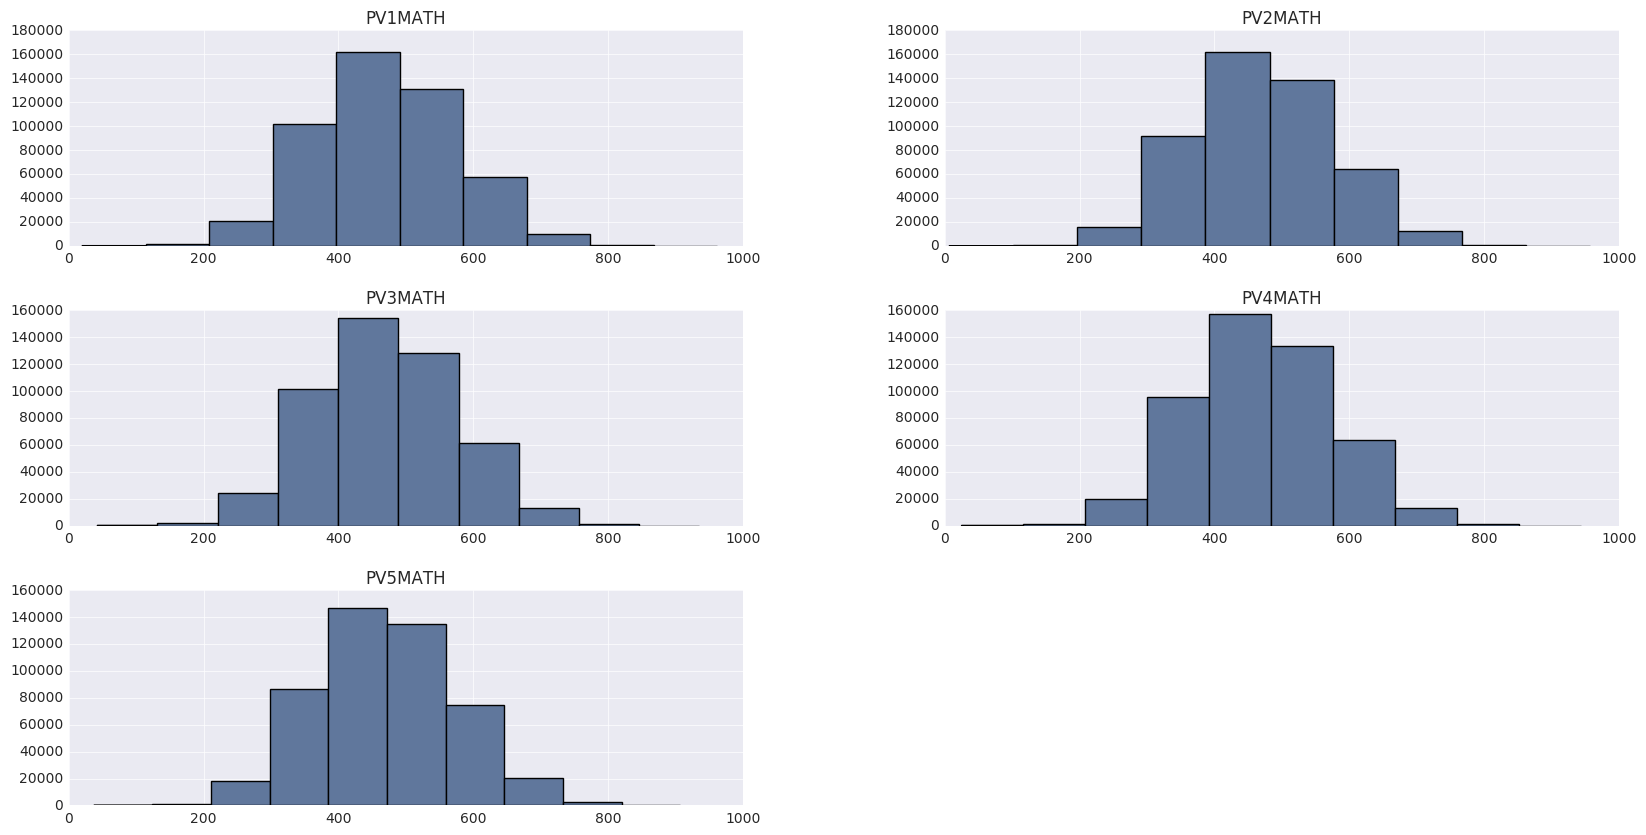

In [274]:
df.hist(column=["PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV5MATH"]);

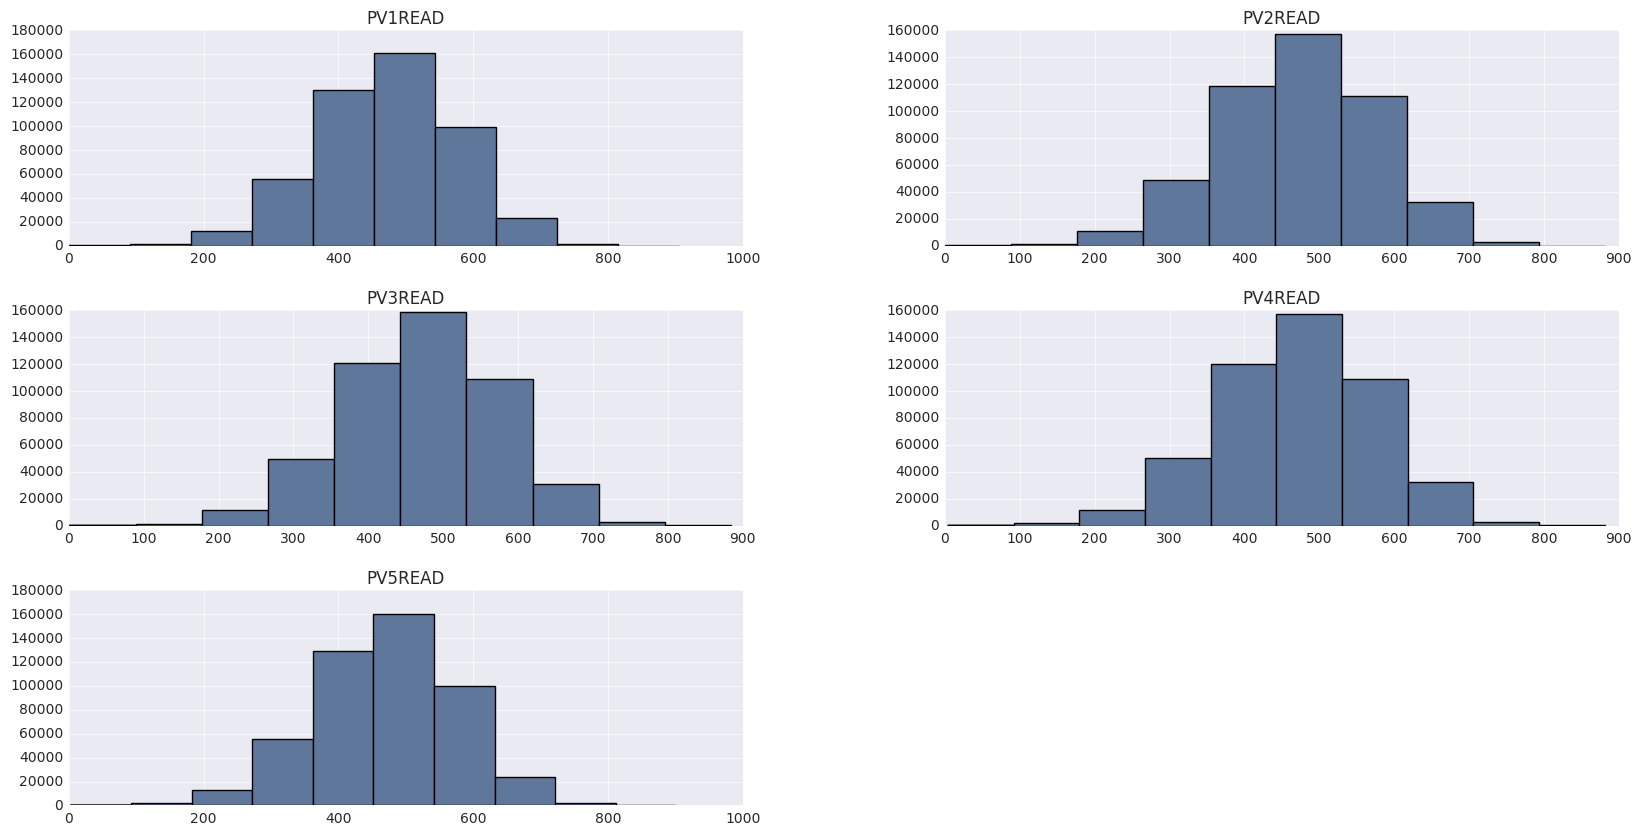

In [275]:
df.hist(column=["PV1READ","PV2READ","PV3READ","PV4READ","PV5READ"]);

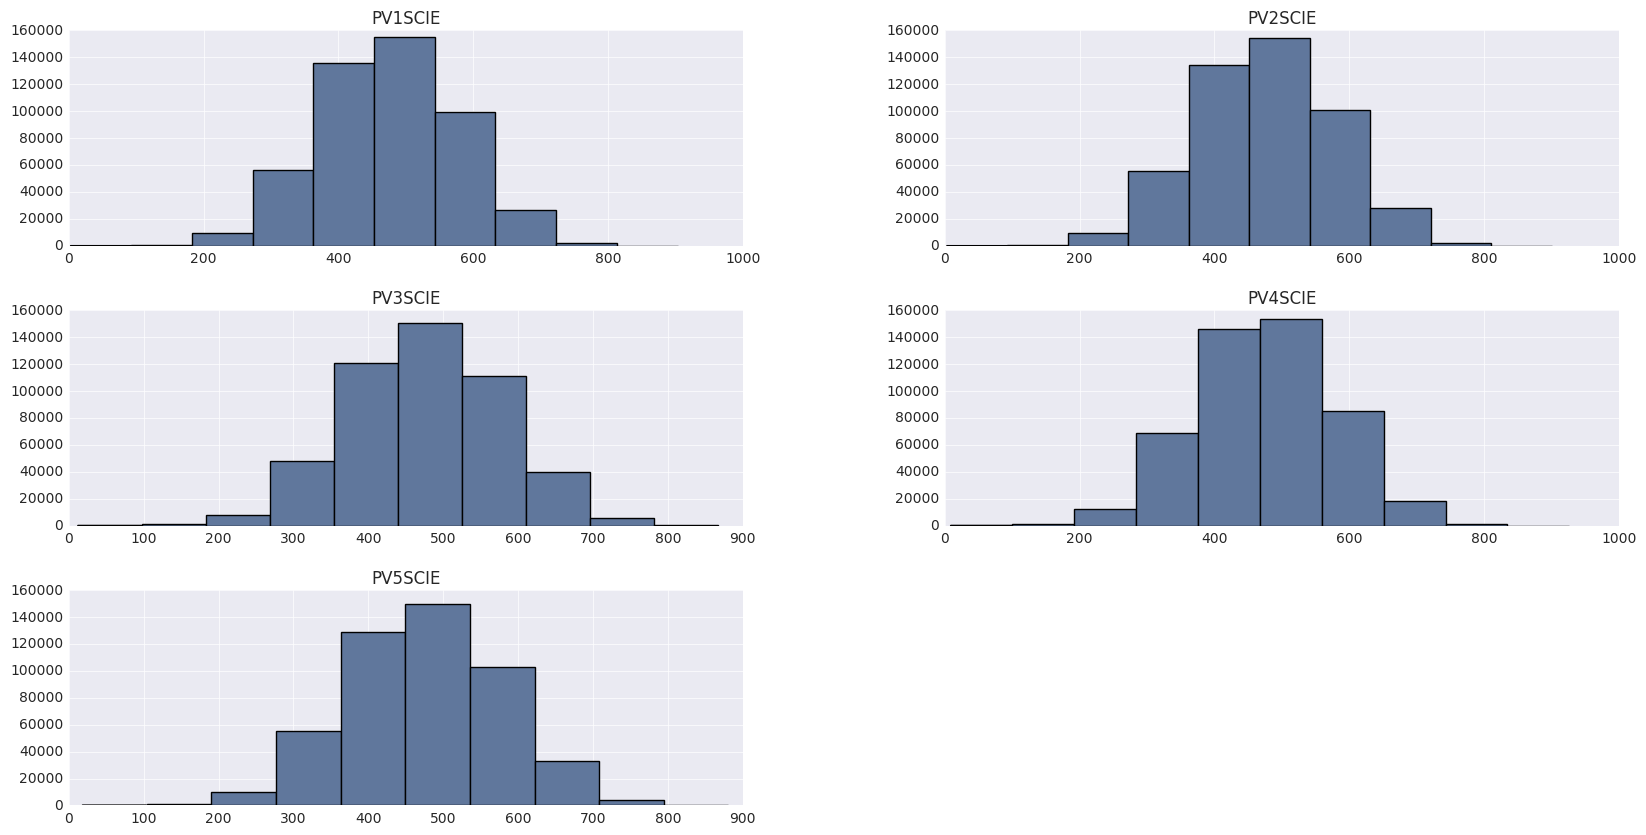

In [276]:
df.hist(column=["PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE"]);

Most of the columns related to test score are normally distributed

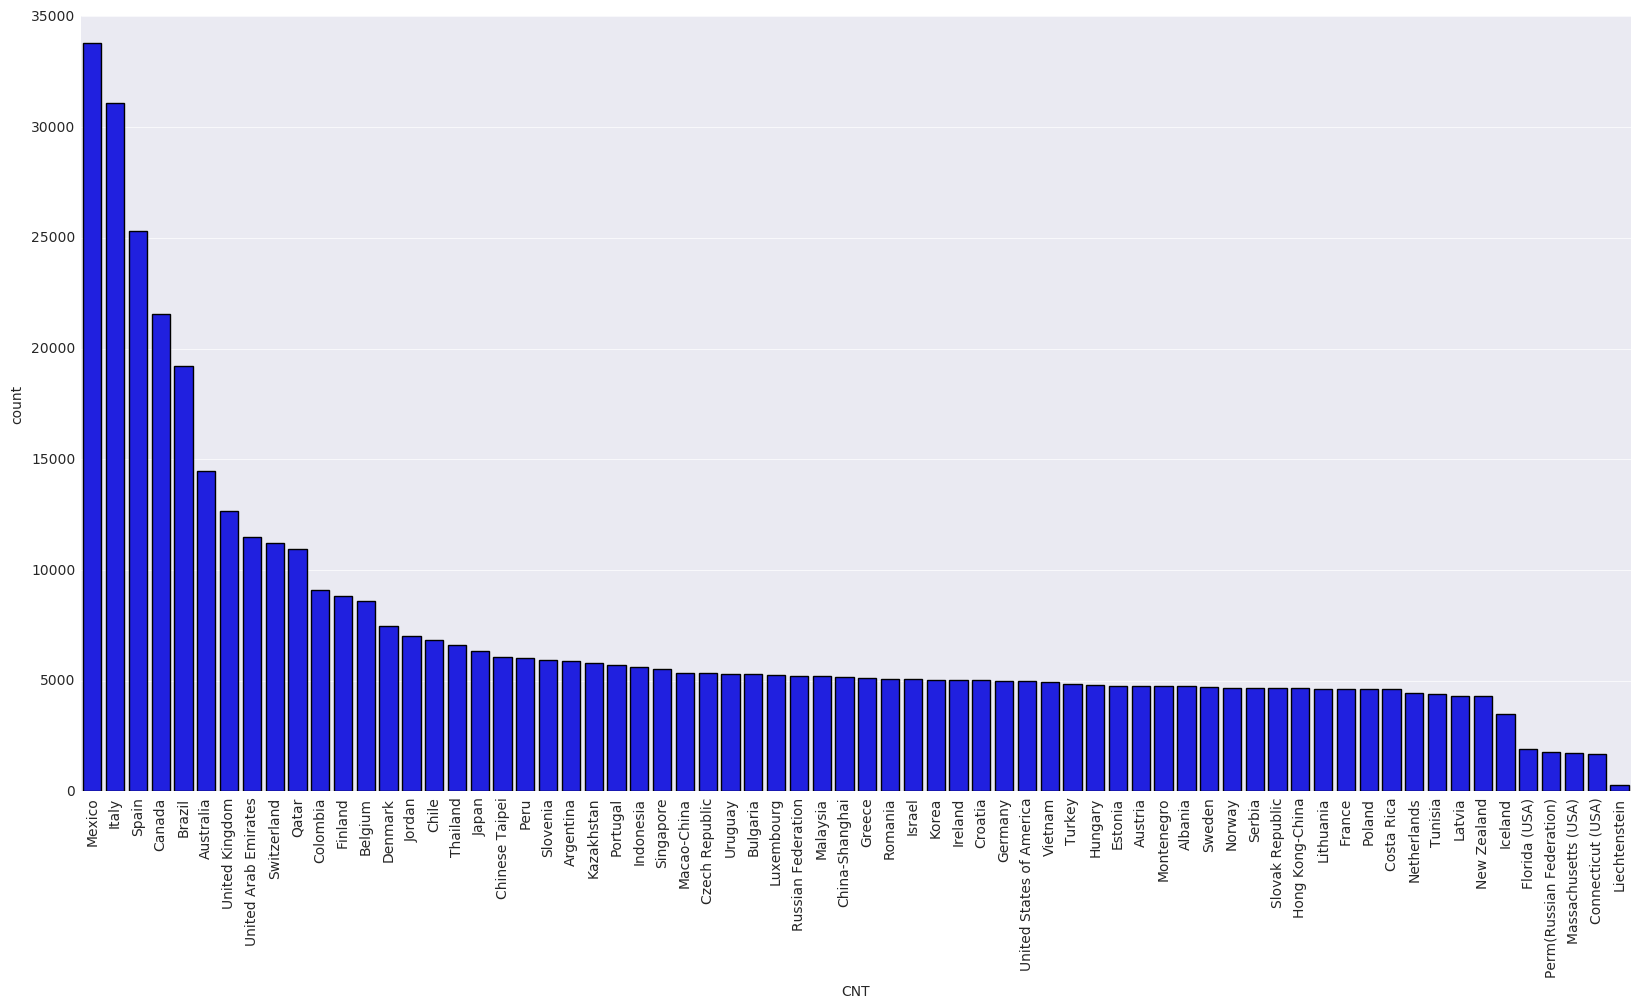

In [277]:
g = sns.countplot(x="CNT", data=df, color="blue",order = df['CNT'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Most of the countries have a count of records from around 5000 to 10000. In the most right-hand side, there are countries having smaller number of records. They are part of bigger countries like USA, Russia. We will see more in detail later.

Now we will compare the two similar columns describing country information.

In [278]:
CNT_list=[country.strip() for country in df.CNT.unique()]
NC_list=[country.strip() for country in df.NC.unique()]

In [279]:
df.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada', 'Switzerland',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Macao-China', 'Mexico', 'Montenegro',
       'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation', 'Singapore',
       'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Chinese Taipei',
       'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [280]:
[country for country in CNT_list if country not in NC_list]

['United Kingdom',
 'Korea',
 'China-Shanghai',
 'Perm(Russian Federation)',
 'Florida (USA)',
 'Connecticut (USA)',
 'Massachusetts (USA)',
 'Vietnam']

In [281]:
[country for country in NC_list if country not in CNT_list]

['United Kingdom (excl.Scotland)',
 'United Kingdom (Scotland)',
 'Republic of Korea',
 'China (Shanghai)',
 'Perm (Russian Federation)',
 'Viet Nam']

Almost the same as the observation initially. Some of the records are part of a country (e.g. Florida, Connecticut). The other records are variations in country naming.

We are going to standardize this country column.

In [282]:
#make the country list as a key-value-pair (key=country; value=country), so it's easier to change country name.
CNT_list_zip = dict(zip(CNT_list,CNT_list)) 

In [283]:
CNT_list_zip["United Arab Emirates"] = "UAE"
CNT_list_zip["United Kingdom"] = "UK"
CNT_list_zip["Serbia"] = "Serbia"
CNT_list_zip["Korea"] = "South Korea"
CNT_list_zip["Chinese Taipei"] = "Taiwan"
CNT_list_zip["Slovak Republic"] = "Slovakia"
CNT_list_zip["Russian Federation"] = "Russia"
CNT_list_zip["Perm(Russian Federation)"] = "Russia"
CNT_list_zip["Hong Kong-China"] = "Hong Kong"
CNT_list_zip["China-Shanghai"] = "China"
CNT_list_zip["Macau"] = "Macau"
CNT_list_zip["Connecticut (USA)"] = "USA"
CNT_list_zip["Florida (USA)"] = "USA"
CNT_list_zip["Massachusetts (USA)"] = "USA"
CNT_list_zip["United States of America"] = "USA"

In [284]:
#apply the country mapping above to the country column in df dataframe
df["country"]= df.CNT.apply(lambda country: CNT_list_zip[country])

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 26 columns):
CNT         485490 non-null object
SUBNATIO    485490 non-null int64
OECD        485490 non-null object
NC          485490 non-null object
SCHOOLID    485490 non-null int64
STIDSTD     485490 non-null int64
ST57Q01     301367 non-null float64
BELONG      313399 non-null float64
ESCS        473648 non-null float64
OUTHOURS    308799 non-null float64
PV1MATH     485490 non-null float64
PV2MATH     485490 non-null float64
PV3MATH     485490 non-null float64
PV4MATH     485490 non-null float64
PV5MATH     485490 non-null float64
PV1READ     485490 non-null float64
PV2READ     485490 non-null float64
PV3READ     485490 non-null float64
PV4READ     485490 non-null float64
PV5READ     485490 non-null float64
PV1SCIE     485490 non-null float64
PV2SCIE     485490 non-null float64
PV3SCIE     485490 non-null float64
PV4SCIE     485490 non-null float64
PV5SCIE     485490 non-null float6

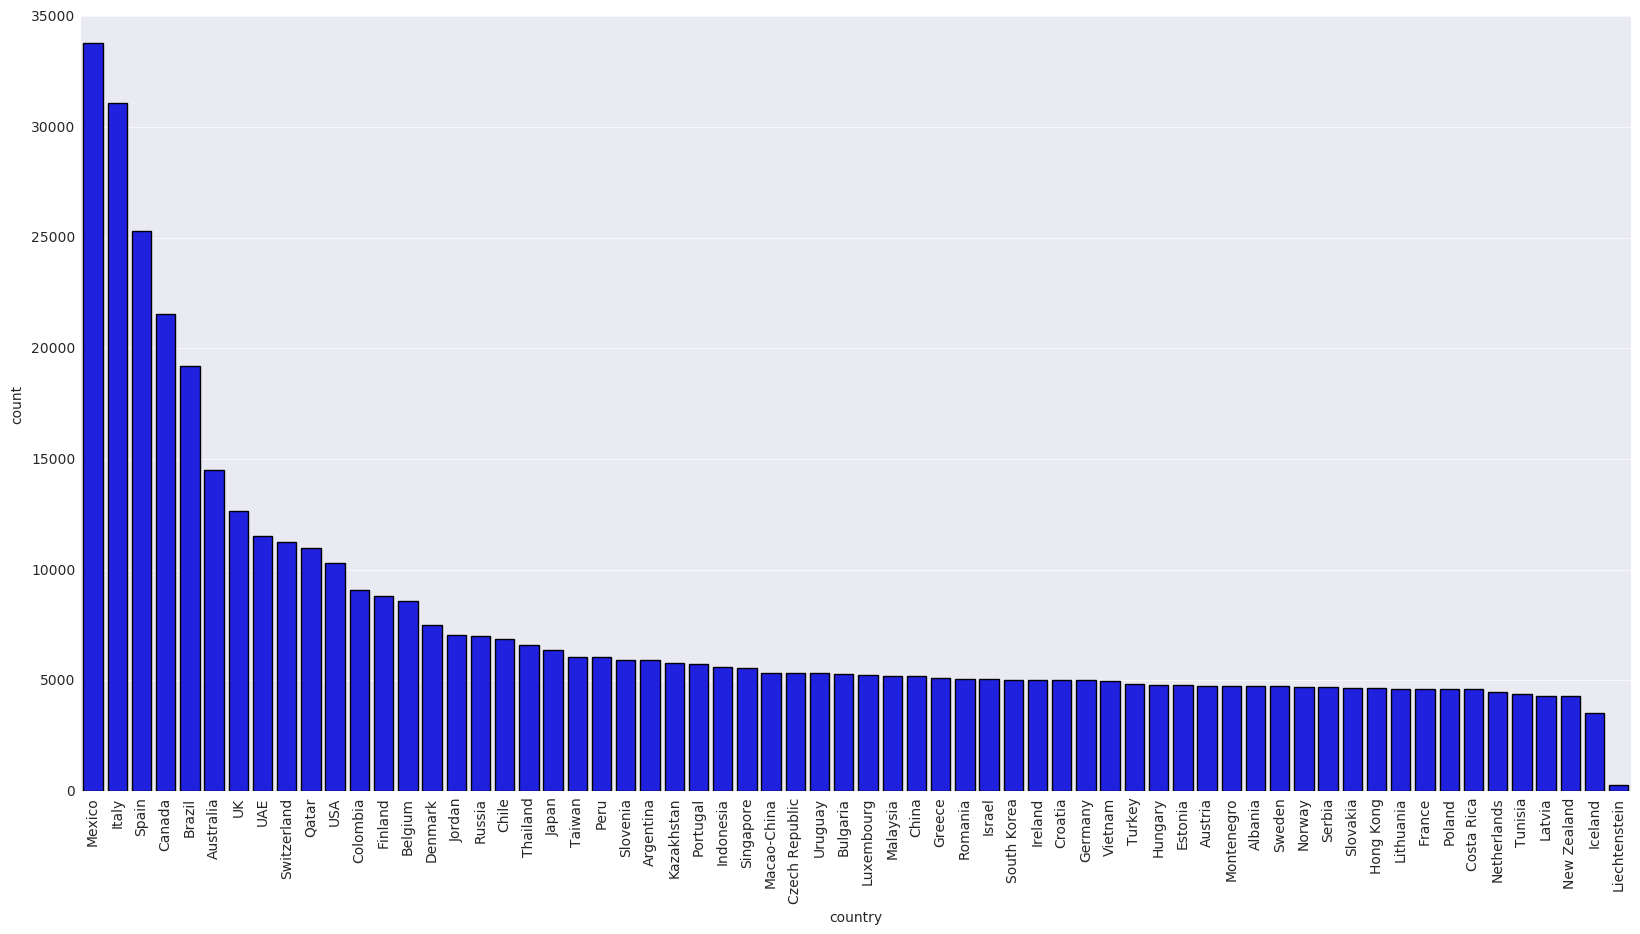

In [286]:
g = sns.countplot(x="country", data=df, color="blue", order = df["country"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

The bar chart above shows that the country naming is more accurate and standardized as compared to the previous version.

Now, we will look at the relationship between "economic, social and cultural status" and the test scores of each country.

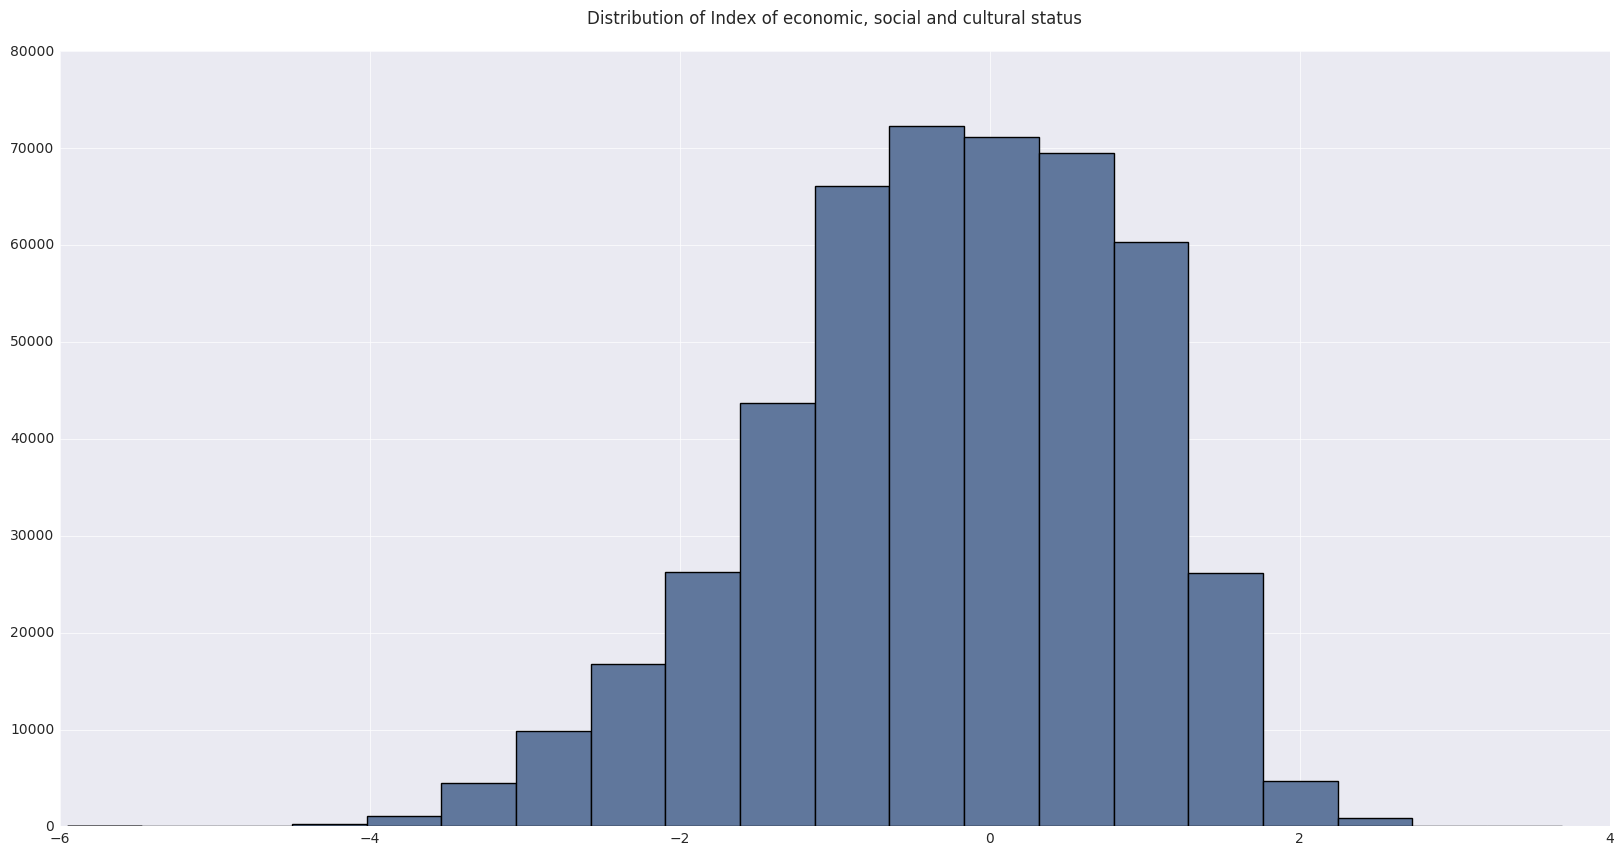

In [287]:
ax = df.ESCS.hist(bins = 20);
ax.set_title("Distribution of Index of economic, social and cultural status\n");

In [288]:
df.ESCS[df.ESCS.isnull()]=None
df.ESCS = df.ESCS.astype(float)
df["ESCS_bk"] = None
df["ESCS_bk"]  = pd.qcut(df.ESCS, q = 5)
df.count()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


CNT         485490
SUBNATIO    485490
OECD        485490
NC          485490
SCHOOLID    485490
STIDSTD     485490
ST57Q01     301367
BELONG      313399
ESCS        473648
OUTHOURS    308799
PV1MATH     485490
PV2MATH     485490
PV3MATH     485490
PV4MATH     485490
PV5MATH     485490
PV1READ     485490
PV2READ     485490
PV3READ     485490
PV4READ     485490
PV5READ     485490
PV1SCIE     485490
PV2SCIE     485490
PV3SCIE     485490
PV4SCIE     485490
PV5SCIE     485490
country     485490
ESCS_bk     473648
dtype: int64

In [289]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("darkgrid")


In [290]:
df.PV1READ = df.PV1READ.astype(float)
df.PV1SCIE = df.PV1SCIE.astype(float)


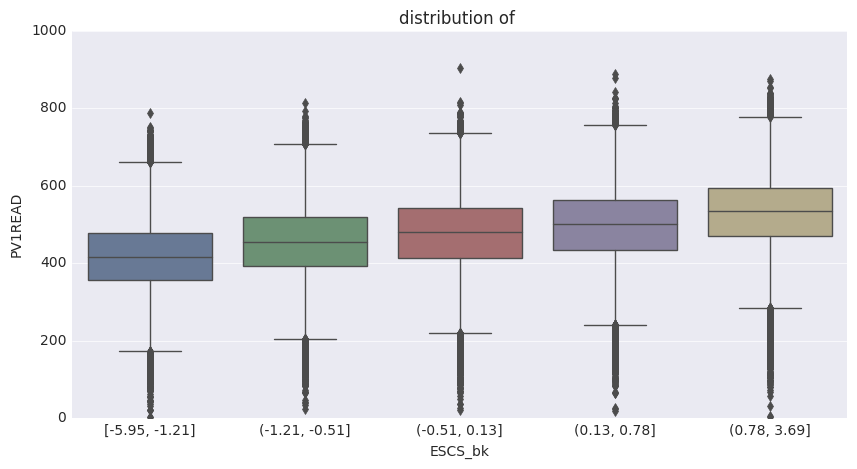

In [291]:
ax = sns.boxplot("ESCS_bk", "PV1READ", data=df);
ax.set_title("distribution of ");

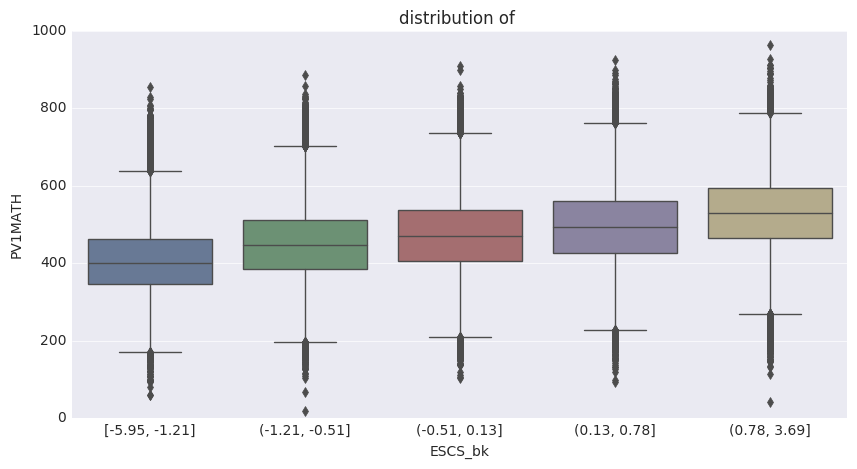

In [292]:
ax = sns.boxplot("ESCS_bk", "PV1MATH", data=df);
ax.set_title("distribution of ");

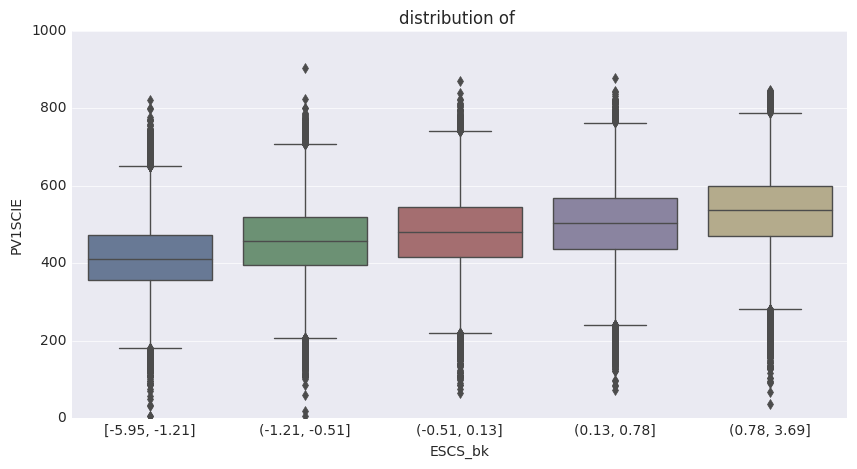

In [293]:
ax = sns.boxplot("ESCS_bk", "PV1SCIE", data=df);
ax.set_title("distribution of ");

The three boxplot charts above shows that higher "economic, social and cultural status" (ESCS) tends to have a higher median value of the test scores for science, mathematics, and readings.

Now, we are going to look at out-of-school study time for homework and its impact to the student's grades/scores.

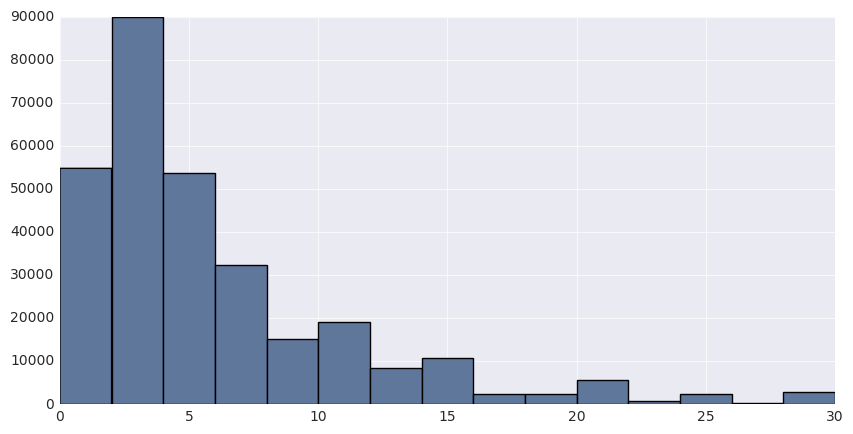

In [296]:
df.ST57Q01.hist(bins = 15);

In [299]:
df["ST57Q01_bk"] = None
df["ST57Q01_bk"]  =pd.cut(df.ST57Q01, bins = [0, 2,4,5,7,8,10,12, 15, 30])

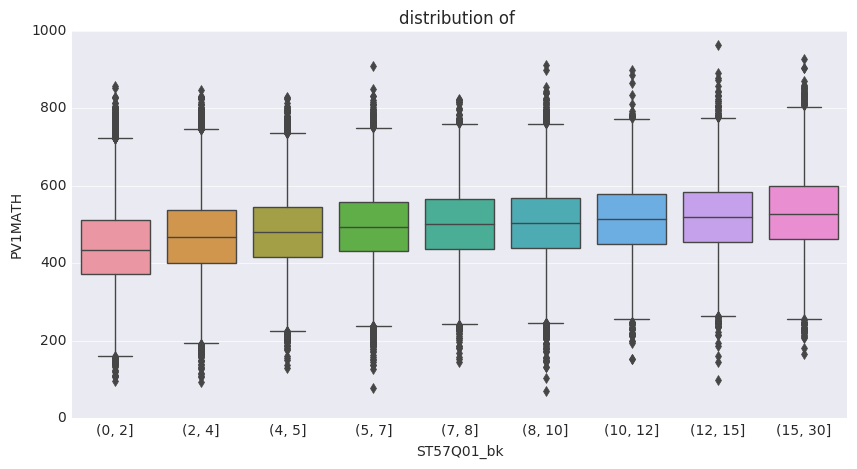

In [300]:
ax = sns.boxplot("ST57Q01_bk", "PV1MATH", data=df);
ax.set_title("distribution of ");

The boxplot above shows that out-of-school study time for homework correlate positively to the math scores of students.

Now, we will look at more detail by both variables above with facet of "economic, social and cultural status" (ESCS).

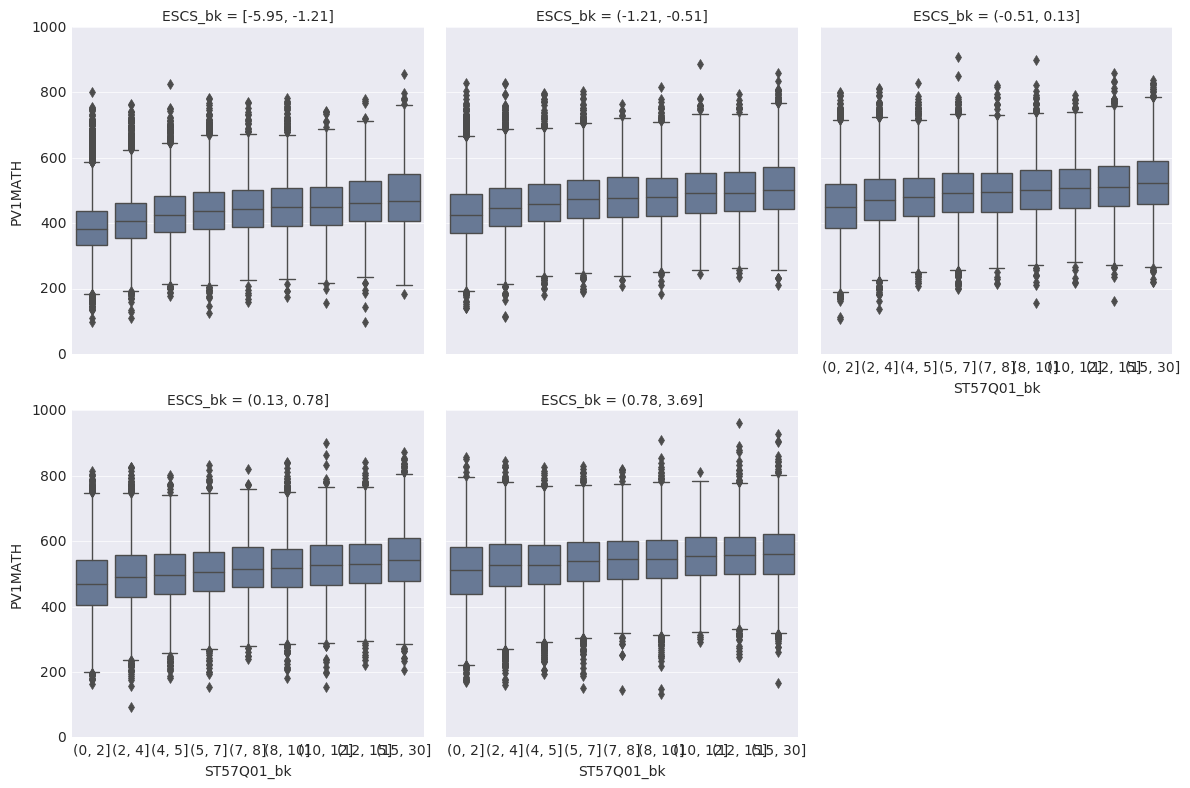

In [301]:
g = sns.FacetGrid(df, size = 4, col_wrap =3, col="ESCS_bk")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

It seems that both ESCS and out-of-school study time (ST57Q01) have a positive correlation with the math scores.

We will separate the bins in ESCS variables into a more granular binning to see if there is any difference.

In [302]:
a_heights, a_bins = np.histogram(df.ESCS[~df['ESCS'].isnull()], bins = 7)

In [303]:
df["ESCS_bk2"] = None
df["ESCS_bk2"] = pd.cut(df.ESCS, bins= a_bins)

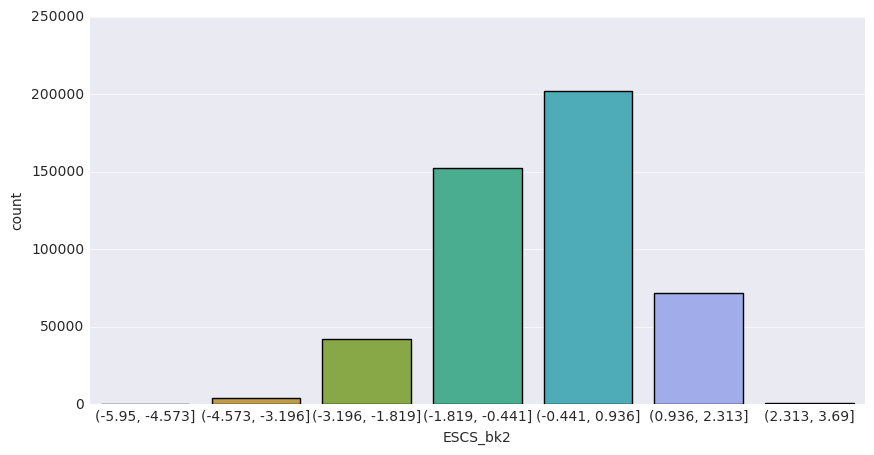

In [304]:
sns.countplot(x="ESCS_bk2", data=df);

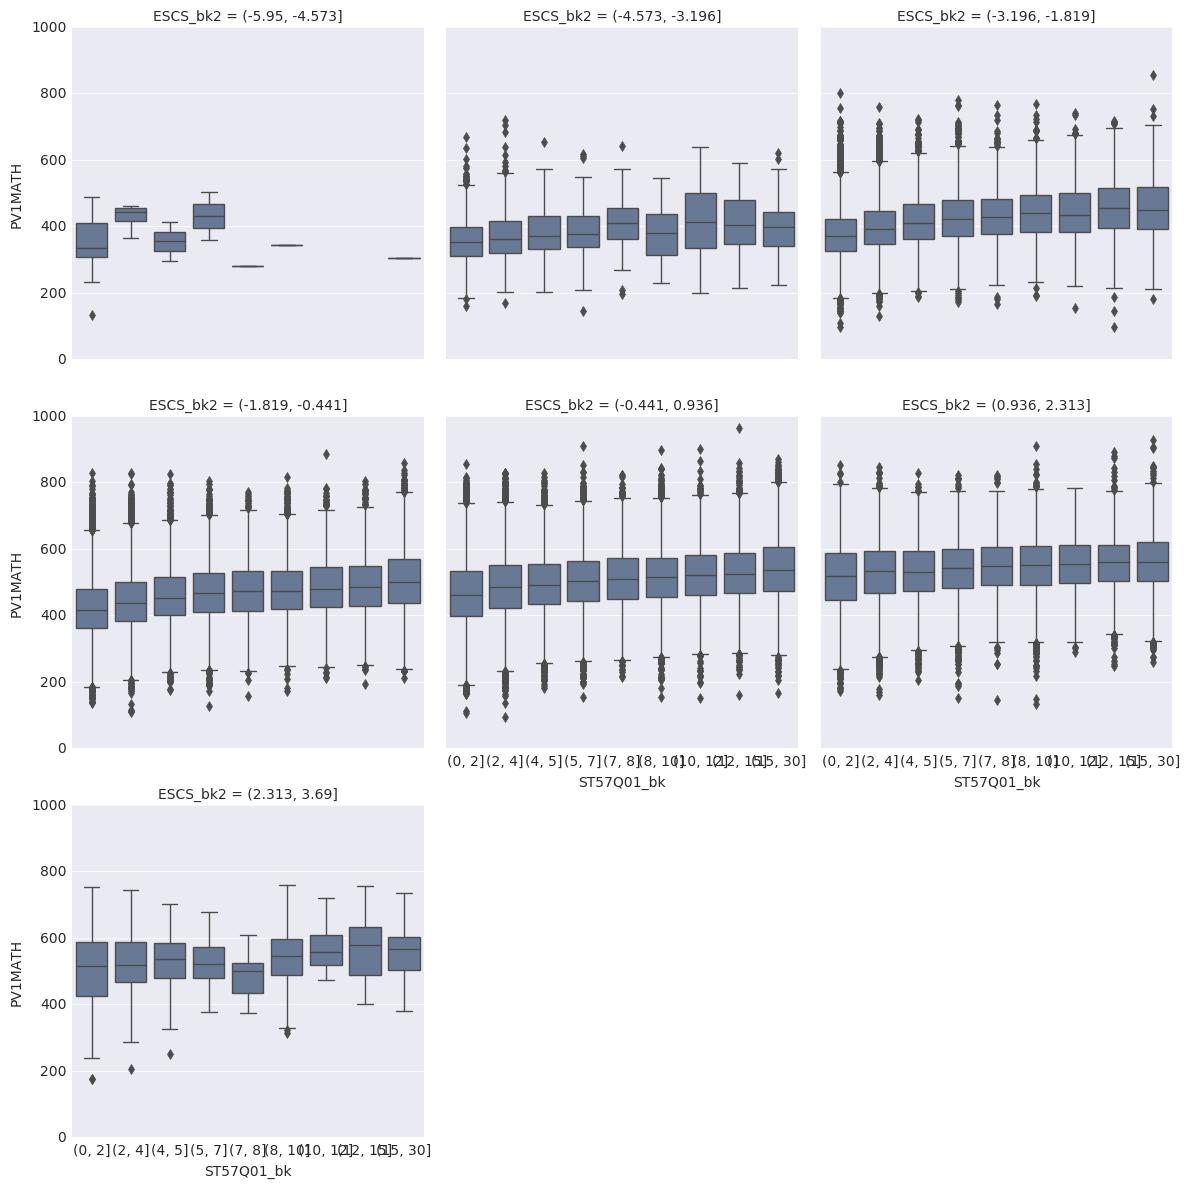

In [305]:
g = sns.FacetGrid(df, size = 4, col_wrap =3, col="ESCS_bk2")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

It seems like our findings are mostly consistent, except for some of the values in both the extreme highest and lowest ESCS.

As such, we could show the visualization of the ESCS and Out-of-school study time with the student average math scores in the final visualization.

Now, it would be great if we could group the average math scores by country.

In [306]:
df_grouped = df.groupby("country").mean()

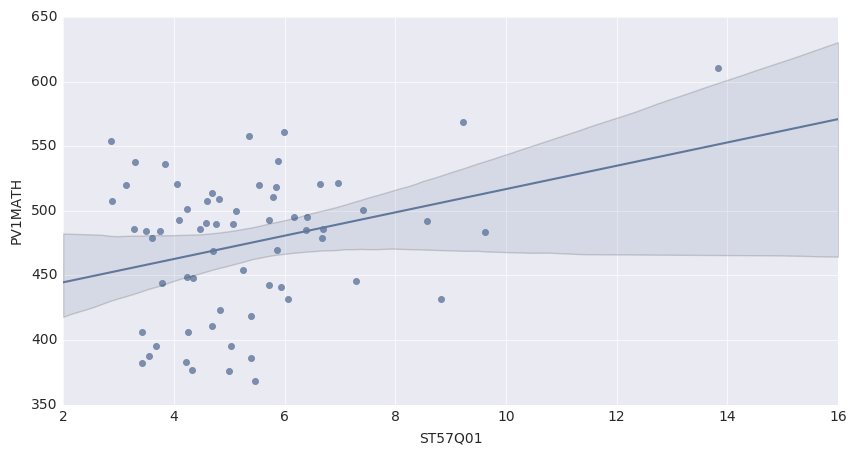

In [307]:
sns.regplot(x="ST57Q01", y="PV1MATH", data=df_grouped);

From the chart above, we can see that most of the countries have an average out-of-school study time of 4 to 6 hours, but the general trend is that the average math scores improve as there are more time spent studying out of school.

Next, we will see if we can improve the visualization above by adding colours to the countries in the scatter plot.

In [308]:
df_continents = pd.read_csv("data/continents.csv", sep = "\t")
df_continents.index=df_continents.CNT.values
df_continents.drop(["CNT"], axis=1, inplace=True)

In [309]:
df_continents.head()

,CONTINENT
Albania,Europe
Argentina,South America
Australia,Oceania
Austria,Europe
Belgium,Europe


In [310]:
df_grouped["continent"] = None
df_grouped["continent"]  = df_continents.loc[df_grouped.index].values

In [311]:
df_grouped.head()

,SUBNATIO,SCHOOLID,STIDSTD,ST57Q01,BELONG,ESCS,OUTHOURS,PV1MATH,PV2MATH,PV3MATH,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,continent
country,,,,,,,,,,,,,,,,,,,,,
Albania,80000.000000,104.069155,2372.0,5.026426,0.373006,NaN,16.945242,395.296185,394.871981,395.468625,...,397.219617,395.132755,397.135674,395.338889,399.068070,399.386174,398.621977,399.013022,398.493400,Europe
Argentina,320022.613406,111.777759,2954.5,3.681577,-0.198815,-0.626649,9.804060,395.402241,395.900086,395.430588,...,403.155658,403.514075,403.542035,404.257305,410.369278,409.927403,410.600994,410.651660,410.842687,South America
Australia,360000.000000,388.862233,7241.0,5.718562,-0.181676,0.189072,9.514453,492.842855,493.335736,493.353218,...,501.012221,501.296108,501.186905,500.944116,511.250599,511.427811,512.042515,511.775281,511.694853,Oceania
Austria,400000.000000,95.853207,2378.0,4.601316,0.560601,0.108333,8.136512,507.711753,507.529917,507.837725,...,491.921403,491.204811,491.517774,491.865745,507.213082,508.041635,508.020063,508.495425,508.413846,Europe
Belgium,560056.729092,145.623124,4299.0,5.540794,-0.039275,0.175149,8.178110,519.868902,519.855583,519.374375,...,512.054427,512.264622,512.687829,512.082752,510.475079,510.124080,510.177555,510.588426,510.147835,Europe


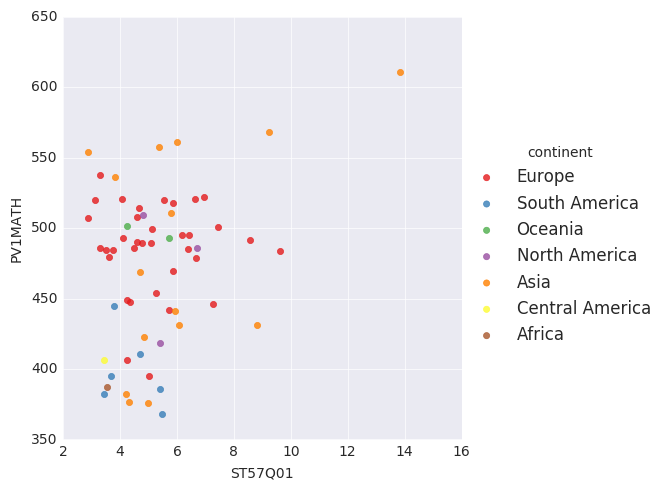

In [312]:
ax = sns.lmplot(x="ST57Q01", y="PV1MATH",hue = "continent", palette="Set1",fit_reg=False,
           data=df_grouped)

The regions, in which countries spent more time studying out of school are mostly in Asia and Europe as shown from the range of 6 to 10 and above area.

Next, we will reorganize the data cleaning steps to create the final dataset that will be used in the D3 visualization.

#### Reorganize the data cleaning process

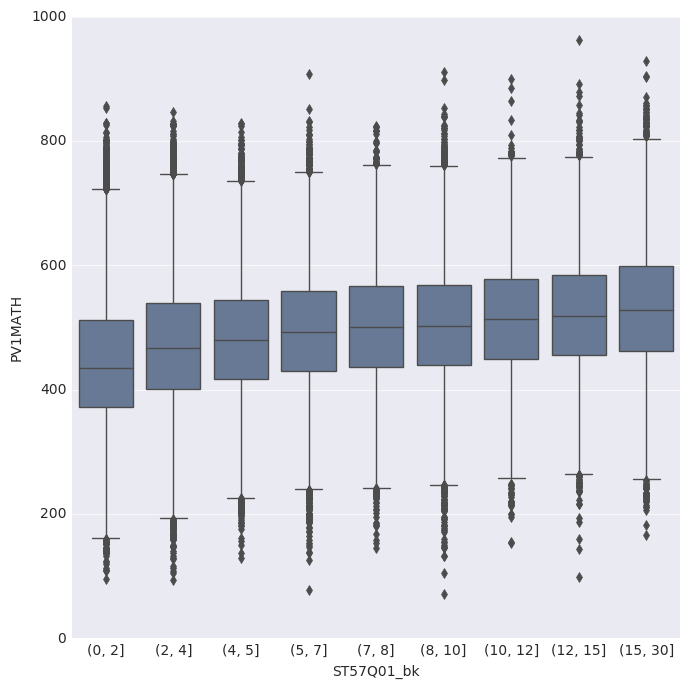

In [313]:
g = sns.FacetGrid(df, size = 7)
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

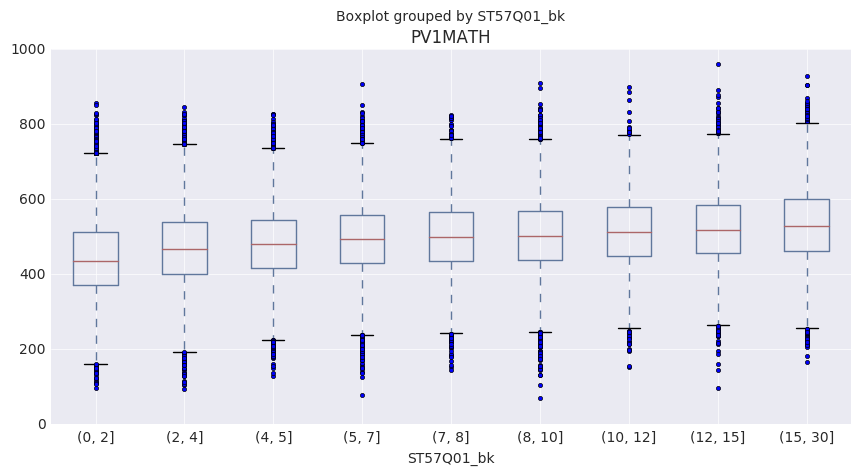

In [314]:
x = df.boxplot(by="ST57Q01_bk", column="PV1MATH", sym="k.", return_type = "dict")

In [320]:
df2 = df.copy()
df2.drop(["BELONG", "OUTHOURS", "PV1READ", "PV1SCIE", "STIDSTD"], axis=1, inplace = True)

In [323]:
#drop irrelevant values
df2.drop(df2[df2.isnull().sum(axis=1)>0].index, inplace=True)

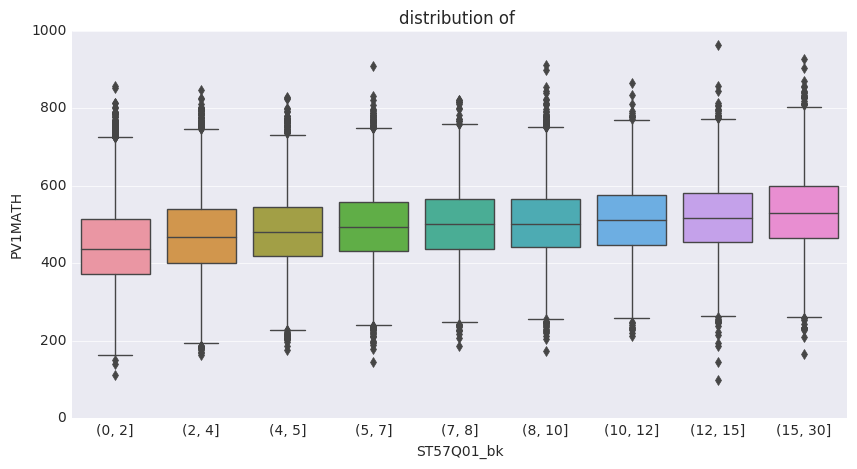

In [325]:
#re-check the distribution
ax = sns.boxplot("ST57Q01_bk", "PV1MATH", data=df2);
ax.set_title("distribution of ");

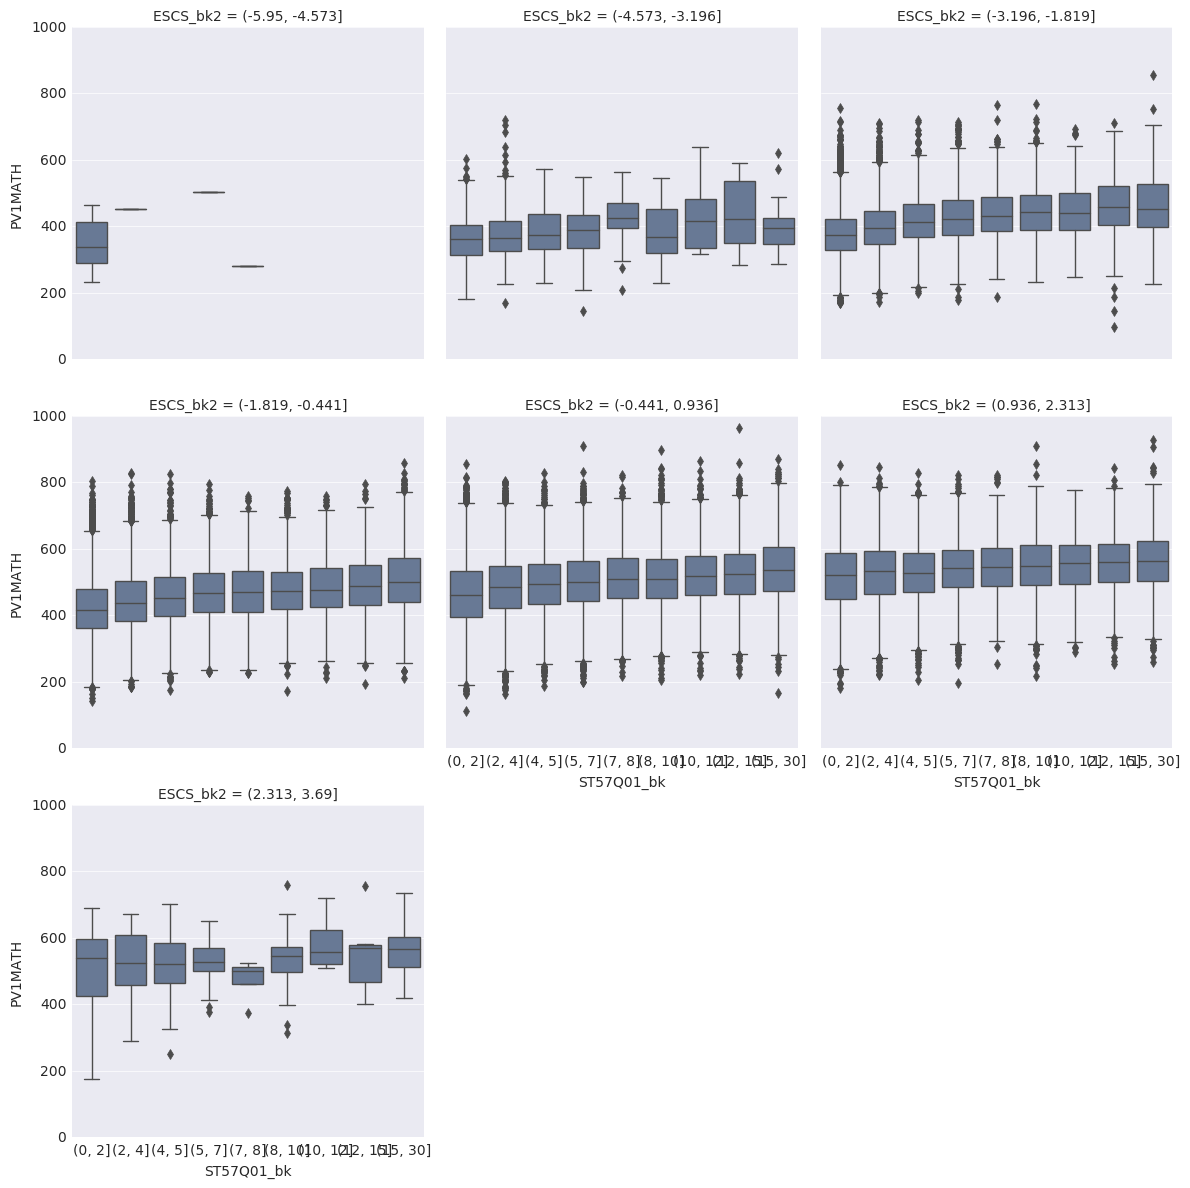

In [326]:
#re-check the distribution
g = sns.FacetGrid(df2, size = 4, col_wrap =3, col="ESCS_bk2")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

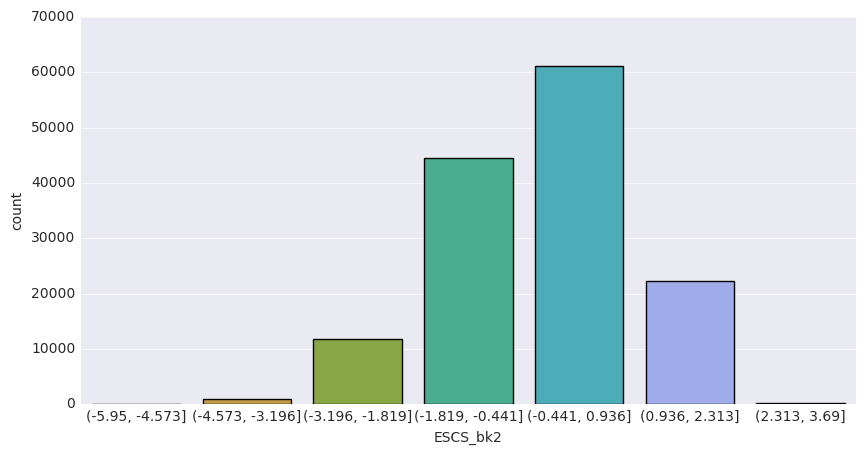

In [327]:
#re-check the distribution
sns.countplot(x="ESCS_bk2", data=df2);

Right now, most of the data cleaning is done. 

The only concern is the outliers that were shown in the boxplot on top.

We are going to check about this in the next step.

In [328]:
#Get the deciles of data to check for outliers
def get_deciles(data):
    data = data["PV1MATH"]
    median = np.median(data)

 
    try:
        upper_quartile = np.percentile(data, 75)
        lower_quartile = np.percentile(data, 25)        
        iqr = upper_quartile - lower_quartile
        upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
        lower_outliers = data[data>upper_whisker].count()
        upper_outliers = data[data<lower_whisker].count()
    except:
        upper_quartile = None
        lower_quartile = None
        upper_whisker = None
        lower_whisker = None
        lower_outliers = None
        upper_outliers = None

    
    
    count = data.count()

    return pd.Series(dict(median= median,
                          upper_outliers=upper_outliers,
                          upper_whisker=upper_whisker,
                          upper_quartile = upper_quartile,
                          lower_quartile=lower_quartile,
                          lower_whisker=lower_whisker,
                          lower_outliers=lower_outliers,
                          count = count
                         ))

In [329]:
#get the deciles for important variables as grouped by ESCS_bk2 and STS57Q01_bk
df_rtn = df.ix[:,["ESCS_bk2","ST57Q01_bk","PV1MATH"]].groupby(["ESCS_bk2", "ST57Q01_bk"]).apply(get_deciles)

In [353]:
print "number of outliers overall: {}".format(df_rtn.lower_outliers.sum() + df_rtn.upper_outliers.sum())

number of outliers overall: 23082.0


In [331]:
#remove other outlier data
l_comb_aux = df.ESCS_bk2.values.categories

i=0
for idx, o_lower in enumerate(l_comb_aux):
    for o_upper in l_comb_aux[idx:]:
        #filter out the data
        df_aux = df.ix[(df.ESCS_bk2>=o_lower) & (df.ESCS_bk2<=o_upper),:]
        #print the index and the count
        s_index_name = "{}{}".format(o_lower, o_upper)
        print "{}:         {}".format(s_index_name, df_aux.shape[0])
        i+=1
print "\nTotal of Combinations:\t{}".format(i)

(-5.95, -4.573](-5.95, -4.573]:         62
(-5.95, -4.573](-4.573, -3.196]:         4040
(-5.95, -4.573](-3.196, -1.819]:         46300
(-5.95, -4.573](-1.819, -0.441]:         198718
(-5.95, -4.573](-0.441, 0.936]:         401081
(-5.95, -4.573](0.936, 2.313]:         472964
(-5.95, -4.573](2.313, 3.69]:         473647
(-4.573, -3.196](-4.573, -3.196]:         3978
(-4.573, -3.196](-3.196, -1.819]:         46238
(-4.573, -3.196](-1.819, -0.441]:         198656
(-4.573, -3.196](-0.441, 0.936]:         401019
(-4.573, -3.196](0.936, 2.313]:         472902
(-4.573, -3.196](2.313, 3.69]:         473585
(-3.196, -1.819](-3.196, -1.819]:         42260
(-3.196, -1.819](-1.819, -0.441]:         194678
(-3.196, -1.819](-0.441, 0.936]:         397041
(-3.196, -1.819](0.936, 2.313]:         468924
(-3.196, -1.819](2.313, 3.69]:         469607
(-1.819, -0.441](-1.819, -0.441]:         152418
(-1.819, -0.441](-0.441, 0.936]:         354781
(-1.819, -0.441](0.936, 2.313]:         426664
(-1.819, -0

In [347]:
#remove other outlier data
df['continent'] = df_continents.loc[df.CNT.values].values
l_comb_aux = df.ESCS_bk2.values.categories

i=0
for idx, o_lower in enumerate(l_comb_aux):
    for o_upper in l_comb_aux[idx:]:
        #filter out the data
        df_aux = df.ix[(df.ESCS_bk2>=o_lower) & (df.ESCS_bk2<=o_upper),:]
        df_aux2 = df_aux.groupby(["continent", "CNT"]).mean().ix[:,["PV1MATH","ST57Q01"]]
        df_aux2.reset_index(inplace=True)
        df_aux2.index = [s_index_name]*df_aux2.shape[0]
        #merge if with last run
        if i==0:
            print "here"
            df_rtn2 = df_aux2.copy()
        else:
            df_rtn2 = pd.concat([df_rtn2, df_aux2])
        #print the index and the count
        s_index_name = "{}{}".format(o_lower, o_upper)
        print "{}:         {}".format(s_index_name, df_aux.shape[0])
        i+=1
print "\nTotal of Combinations:\t{}".format(i)
print "\nNumber of rows in the dataframe: {}".format(df_rtn2.shape[0])

here
(-5.95, -4.573](-5.95, -4.573]:         62
(-5.95, -4.573](-4.573, -3.196]:         4040
(-5.95, -4.573](-3.196, -1.819]:         46300
(-5.95, -4.573](-1.819, -0.441]:         198718
(-5.95, -4.573](-0.441, 0.936]:         401081
(-5.95, -4.573](0.936, 2.313]:         472964
(-5.95, -4.573](2.313, 3.69]:         473647
(-4.573, -3.196](-4.573, -3.196]:         3978
(-4.573, -3.196](-3.196, -1.819]:         46238
(-4.573, -3.196](-1.819, -0.441]:         198656
(-4.573, -3.196](-0.441, 0.936]:         401019
(-4.573, -3.196](0.936, 2.313]:         472902
(-4.573, -3.196](2.313, 3.69]:         473585
(-3.196, -1.819](-3.196, -1.819]:         42260
(-3.196, -1.819](-1.819, -0.441]:         194678
(-3.196, -1.819](-0.441, 0.936]:         397041
(-3.196, -1.819](0.936, 2.313]:         468924
(-3.196, -1.819](2.313, 3.69]:         469607
(-1.819, -0.441](-1.819, -0.441]:         152418
(-1.819, -0.441](-0.441, 0.936]:         354781
(-1.819, -0.441](0.936, 2.313]:         426664
(-1.81

In [349]:
#remove other outlier data
l_comb_aux = df.ESCS_bk2.values.categories

i=0
for idx, o_lower in enumerate(l_comb_aux):
    for o_upper in l_comb_aux[idx:]:
        #filter out the data
        df_aux = df.ix[(df.ESCS_bk2>=o_lower) & (df.ESCS_bk2<=o_upper),:]
        df_aux2 = df_aux.groupby(["ST57Q01_bk"]).apply(get_deciles)
        df_aux2.reset_index(inplace=True)
        df_aux2.index = [s_index_name]*df_aux2.shape[0]
        #merge if with last run
        if i==0:
            print "here"
            df_rtn = df_aux2.copy()
        else:
            df_rtn = pd.concat([df_rtn, df_aux2])
        #print the index and the count
        s_index_name = "{}{}".format(o_lower, o_upper)
        print "{}:         {}".format(s_index_name, df_aux.shape[0])
        i+=1
print "\nTotal of Combinations:\t{}".format(i)
print "\nNumber of rows in the dataframe: {}".format(df_rtn.shape[0])

here
(-5.95, -4.573](-5.95, -4.573]:         62
(-5.95, -4.573](-4.573, -3.196]:         4040
(-5.95, -4.573](-3.196, -1.819]:         46300
(-5.95, -4.573](-1.819, -0.441]:         198718
(-5.95, -4.573](-0.441, 0.936]:         401081
(-5.95, -4.573](0.936, 2.313]:         472964
(-5.95, -4.573](2.313, 3.69]:         473647
(-4.573, -3.196](-4.573, -3.196]:         3978
(-4.573, -3.196](-3.196, -1.819]:         46238
(-4.573, -3.196](-1.819, -0.441]:         198656
(-4.573, -3.196](-0.441, 0.936]:         401019
(-4.573, -3.196](0.936, 2.313]:         472902
(-4.573, -3.196](2.313, 3.69]:         473585
(-3.196, -1.819](-3.196, -1.819]:         42260
(-3.196, -1.819](-1.819, -0.441]:         194678
(-3.196, -1.819](-0.441, 0.936]:         397041
(-3.196, -1.819](0.936, 2.313]:         468924
(-3.196, -1.819](2.313, 3.69]:         469607
(-1.819, -0.441](-1.819, -0.441]:         152418
(-1.819, -0.441](-0.441, 0.936]:         354781
(-1.819, -0.441](0.936, 2.313]:         426664
(-1.81

In [350]:
df_rtn.reset_index(inplace=True)
df_rtn2.reset_index(inplace=True)

In [351]:
df_rtn2.to_csv("data/countries_agregated2.csv", index=False)

In [352]:
df_rtn.to_csv("data/boxplot_data2.csv", index=False)